# Control theory. Course introduction.

## TP1. System modeling. State-space representation of dynamical systems.

## Study load

Course grade breakdown:

    Labs - 40%
    
    Final project presentation 30%

    Final test 30%
    
File name for lab submission: yourname_labnumber.ipynb (example: elenavanneaux_TP1.ipynb)    

The completed notebooks should be sent to your tutor (elena.vanneaux@ensta.fr or adnane.saood@ensta.fr) before the beginning of the next session. Please add [APM_4AUT2_TA] to the topic of e-mail.

## Prerequisites for practice
### Math
During the course, we will cover the following areas of mathematics:
    
    1. Linear Algebra

    2. Calculus

    3. Differential equations

    4. Dynamics (Mechanics and Physics)

### Python programming
In the labs we will use a Python programming language and the following libraries:

    1. NumPy https://numpy.org/doc/stable/

    2. SciPy https://docs.scipy.org/doc/scipy/

    3. Matplotlib https://matplotlib.org/stable/tutorials/index

    4. SymPy https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html

### Jupyter Notebook Markdown Cells Documentation

Please check on Markdown cells documentation, to provide a fancy look for your notebooks!

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

## Ex.1: Vehicle Suspension System

Vehicle Suspension System

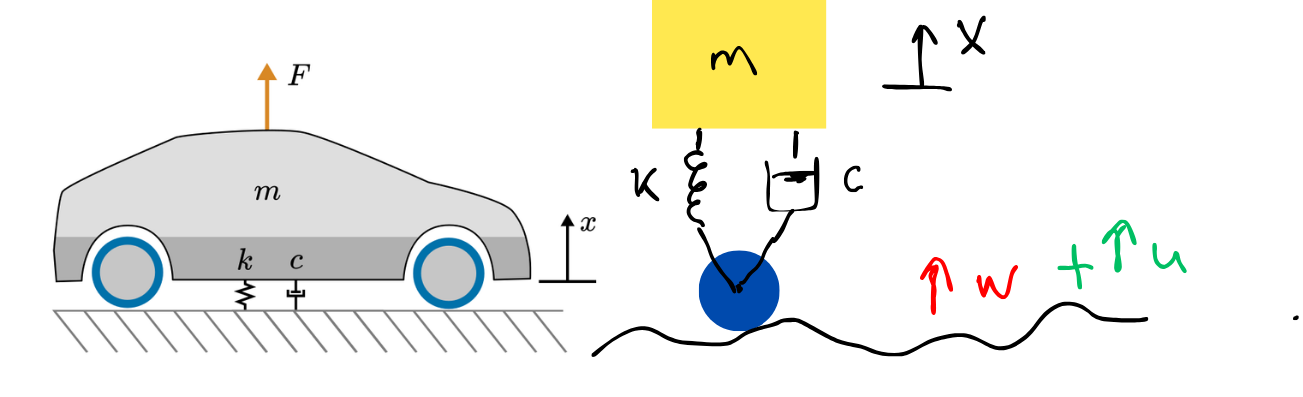

with the following system parameters:

    (m) mass 1.0 kg

    (k) spring constant 5.0 N/m

    $(c)$ damping constant 2 Ns/m

### **Equation of Motion:**

For a mass-spring-damper system, the equation of motion can be derived using Newton's second law or by applying the principles of dynamics. The general form of the equation is:

$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = u + w
$$

### **State-Space Representation:**

To convert the second-order differential equation into a system of first-order differential equations, we introduce the following state variables:
- Let $ x_1 = x $ (position),
- Let $ x_2 = \dot x $ (velocity).

The system becomes:

$$\dot x = Ax+Bu+Dw$$

where
state vector $x = (position, velocity)$, and state and control matrices are the following:
$$ A = \begin{pmatrix} 0&1\\ -\frac{k}{m}&-\frac{c}{m}\end{pmatrix},\ B = \begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix},\ D =\begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix}$$

## TODO

Today we will study the dynamic of a passive suspension system, i.e. we assume that there is no active control ($u =0,$ for all $t>0$). 

1. Check on the code below, what kind of situation does it model?

The code below models a situation where the road is completely flat, ie. the disturbance is inexistant ($w = 0$)

Modify the code below to analyse how the suspension system will work on different roads.

2. Let disturbance input $w(t)$ is given by a step function
    $$w = \left\{\begin{aligned}
        &0, \quad t <3.0\\
        &1.0,  \quad 3.0 \leq t < 7.0\\
        &0,  \quad t \geq 7
    \end{aligned}\right.$$
   How will it affect the behavior of the system? What kind of road scenario is modeled with step function disturbance?

This step disturbance, can model when there is a speed bump, and thus a sudden increase in height happens.
This disturbance makes the position and velocity to increase rapidly and suddenly.

3. How the system behavior will change additionally assume that there is no damper in the system (i.e., c=0)?

If we replace the $c=2$ by $c=0$, we can see that the resulting position and velocity are now completely harmonic, and after a little bit of time, they behave like sinusoïdal functions. Thus, with no damper in the system, the system will never stop oscillating.

4. Let now assume that the system is disturbed by a sinusoidal input
    $$w = sin(t)$$
   How will it affect the behavior of the system? What kind of road profile does a sinusoidal input model?

With a disturbance of $w = sin(t)$, we model a road profile that is cyclic, and oscillate up and down indefinitly. 
With this disturbance, the velocity as well as the position will evolve as sinusoïdal functions, because they will simply follow the road profile, with a little bit of dampering.

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x is a state vecot, t is a current time, A is a dynamic matrix, B is a control matrix, D is a disturbance matrix, 
# u_func(t) is a control input, w_func(t) is a disturbance input 
def StateSpace(x, t, A, B, D, u_func, w_func):
    w = w_func(t)
    u = u_func(t)
    # Flatten u and w for proper matrix operations
    return np.dot(A, x) + np.dot(B, u).flatten() + np.dot(D, w).flatten()

# OpenLoopInputOutputSystem with time-dependent w(t)
def OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0):
    # Solve the ODE system with odeint, passing the time-dependent w function
    solution = odeint(StateSpace, x0, T, args=(A, B, D, u_func, w_func))
    # Output calculation using C and the solution
    return (C @ solution.T)    

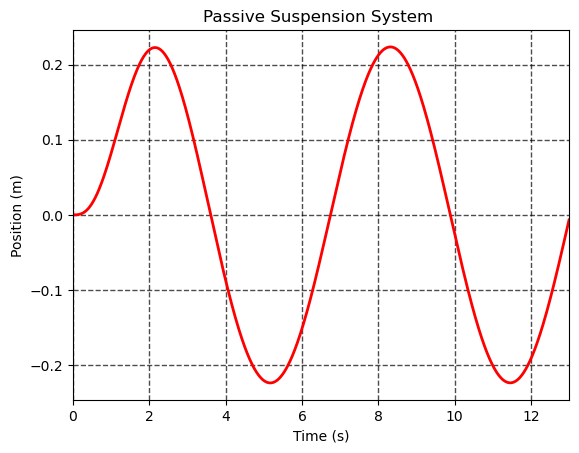

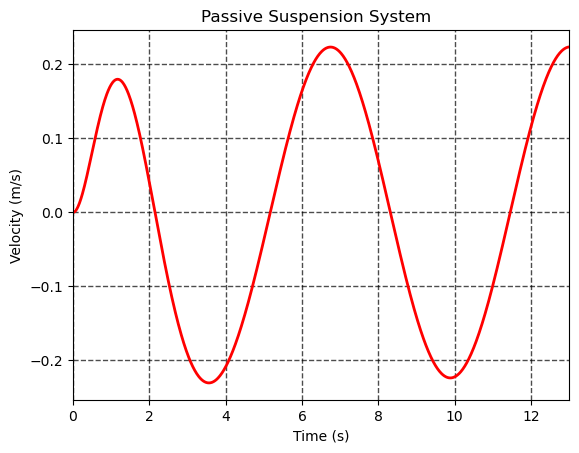

In [3]:
# System parameters
m = 1
k = 5
c = 2
g = 9.8

A = np.array([[0, 1],
              [-k/m, -c/m]])  # Corrected c instead of rho

B = np.array([[0],
              [1/m]])  # Reshaped to column vector

D = np.array([[0],
              [1/m]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([0, 0]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 13  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    # return 1 if (t >= 3 and t<7) else 0 # Disturbance input
    return np.sin(t)
    
def u_func(t):
    return 0.0 # Control input

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System  ')
plt.show()

## Ex.2: DC Motor Speed: System Modeling

A common actuator in control systems is the DC motor. It directly provides rotary motion and, coupled with wheels or drums and cables, can provide translational motion. The electric equivalent circuit of the armature and the free-body diagram of the rotor are shown in the following figure.

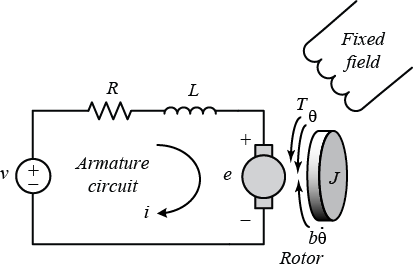

For this example, we will assume that the input of the system is the voltage source ($V$) applied to the motor's armature, while the output is the rotational speed of the shaft $\dot{\theta}$. The rotor and shaft are assumed to be rigid. We further assume a viscous friction model, that is, the friction torque is proportional to shaft angular velocity. We will assume that the magnetic field is constant and, therefore, that the motor torque is proportional (with constant $K_t$) to only the armature current. Let us remark that in SI units the motor torque and back emf constants are equal, that is, $K_t = K_e$.

The physical parameters for our example are:

    (J)   moment of inertia of the rotor     0.01 kg.m^2

    (b)     motor viscous friction constant    0.1 N.m.s

    (Ke)    electromotive force constant       0.01 V/rad/sec

    (Kt)    motor torque constant              0.01 N.m/Amp

    (R)     electric resistance                1 Ohm

    (L)     electric inductance                0.5 H

## TODO
1. Let us assume that the state vector is $x = (w,i)$ where $w = \dot\theta$ is an angular velocity of the motor. Derive the state space equations of the system. Is the system linear?

This system is ruled by the following coupled equations : 
$$J\ddot\theta + b \dot\theta = K_t i $$
$$ L\frac{di}{dt} + Ri = V - K_l \dot\theta$$
If we take $w = \dot\theta$, the previous equations become :
$$J\dot w + b w = K_t i $$
$$ L\frac{di}{dt} + Ri = V - K_l w$$
This system is linear.

2. Rewrite the system equations in canonical first order ODE system form.

Now we want to re-arrange the equations to have a matrix first order ODE. To do so, we first put the derivatives on the left :
$$\dot w  = \frac{K_t}{J} i - \frac{b}{J} w$$
$$ \frac{di}{dt}= \frac{V}{L} - \frac{K_l}{L} w - \frac{R}{L}i $$

Then, we take $x = (w,i)$, and try to make these two equations, one matrix equation on $x$. We want : $\dot x = Ax + B u$, with $u = V$ the control vector.
We get the following equation : 
$$ \begin{pmatrix} \dot w \\ \frac{di}{dt} \end{pmatrix} = \begin{pmatrix} -\frac{b}{J} & \frac{K_t}{J} \\ - \frac{K_l}{L} & -\frac{R}{L} \end{pmatrix} \begin{pmatrix} w \\ i \end{pmatrix} + \begin{pmatrix} 0 \\ \frac{1}{L} \end{pmatrix} V$$

Thus, the final equation is : 
$$ \dot x = Ax + BV $$ 
with 
$$ w=\dot\theta,\ x = \begin{pmatrix} w \\ i \end{pmatrix},\ A = \begin{pmatrix} -\frac{b}{J} & \frac{K_t}{J} \\ - \frac{K_l}{L} & -\frac{R}{L} \end{pmatrix},\ B = \begin{pmatrix} 0 \\ \frac{1}{L} \end{pmatrix} $$


3. Simulate the output of the system corresponding to uncontrolled system (i.e V = 0) and a random initial position.

We take $V=0$ and put the angular velocity to a random initial value, and the initial current to 0.
As we could expect, the motor spins at the start, but as we don't give it energy ($V=0$), after some time, it stops spinning.

4. Let's assume that the motor is off. How will the system's behavior change if we apply 15 volts as an input?

Now we take the voltage, and put it at 15 volts after 1s (to see the changes when we apply suddenly the voltage).
We can see that the angular velocity as well as the current increase following an exponantial growth, then plateau at some value of the angular velocity and current.

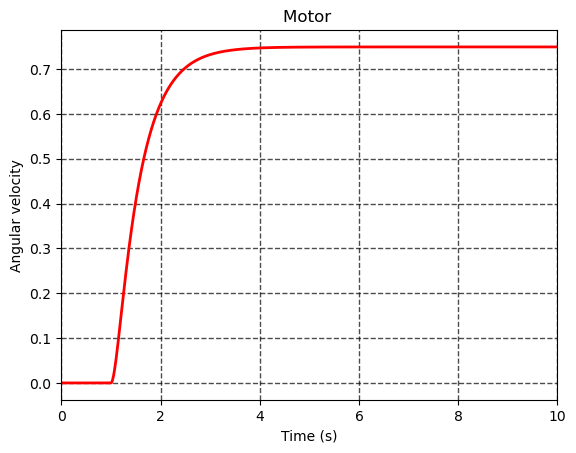

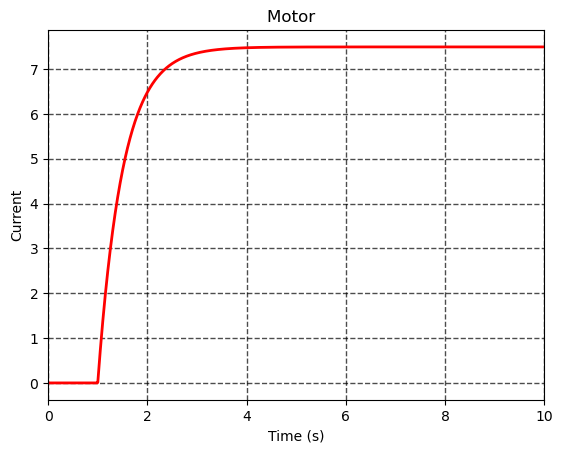

In [4]:
# System parameters
J = 0.01
b = 0.1
K = 0.01    # Kt = Kl = K
R = 1
L = 0.5

# Matrices 
A = np.array([[-b/J, K/J],
              [-K/L, -R/L]])

B = np.array([[0],
              [1]])

D = np.array([[0],
              [0]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
# x0 = np.array([np.random.uniform(0,1), 0]).flatten() # Initial random
x0 = np.array([0,0]).flatten() # Initial null state

# Time settings
t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0
    
V = 15
def u_func(t):
    # return V # Control input
    return V if t>1 else 0

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity')
plt.xlabel('Time (s)')
plt.title('Motor ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Current')
plt.xlabel('Time (s)')
plt.title('Motor  ')
plt.show()

## Ex.3: Pendulum

Let us now consider the pendulum example from the lecture.

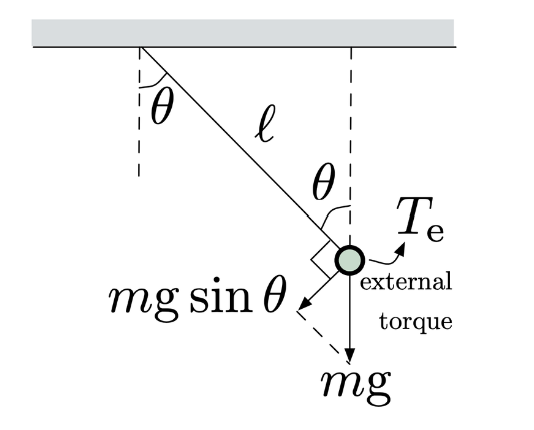

Using the free body diagram we can derive the following equation of motion.
$$ml^2*\ddot \theta = -m*g*\sin(\theta)*l +T_e$$

we then rewrite it in the canonical form
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l}*\sin(\theta_1) + \frac{T_e}{m*l^2}
\end{aligned}
$$
where we use the notation $\theta_1  = \theta, \theta_2 = \dot\theta_1$.

We then linearise the system around an equilibrium point ($\theta_1, \theta_2, T_e$) = (0,0,0), with a help of symbolic calculus (see the code below) and get a linear time invariant model
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l} + \frac{T_e}{m*l^2}
\end{aligned}
$$

## TODO
1. Let fisrt consider the system without control ($T_e = 0$). Plot the trajectories of linear and nonlinear systems for
   $\theta^0 = (0.1, 0)$ and  $\theta^0 = (1, 0).$ What kind of conclusion could you make when analyzing the simulation's result?

Without control, we can observe two different behaviours based on the initial conditions :
- If we make the initial angle little, we can barely notice any difference between the real and the approximated solution.
- If we make the initial angle big, we can see that the two solutions are a lot different : the frequency of the real solution changes over time, thus it is not a sinusoïdal behaviour, contrary to the linearly approximated model.

2. Let $\theta^0 = (0, 0)$, play with different control inputs, and look at how they affect linear and nonlinear systems correspondingly. What kind of conclusion can you make from this?

We can see that if we use a control torque whose value is little, then the resulting angle will be little, and the frequency of both solutions will stay the same and the amplitude will be bigger for the non-linear model.
However, if we apply a bigger torque, the resulting angle will be bigger and thus we will see the impacts of the non-linearity : the frequency will change over time.

In [13]:
#profite from symbolic calculus do easy the math part
import sympy as sp
m, l, g, Te = sp.symbols('m l g Te')
theta1, theta2, dottheta2 = sp.symbols('theta1 theta2 dottheta2')

# Define the differential equations of the system
eq1 = m*l*l* dottheta2 + m*g*sp.sin(theta1)*l - Te

# Solve for the first derivative of theta1 (angular velocity)
dotthet2_sol = sp.solve(eq1, dottheta2)[0]

# Solve for the first derivative of y1 (linear velocity)
dottheta2_sol = sp.simplify(sp.solve(eq1, dottheta2)[0])

# Define the state-space representation of the system dynamics
f1 = theta2
f2 = dotthet2_sol
f = sp.Matrix([f1, f2])

# Define state and control variables
variables_x = sp.Matrix([theta1,theta2])
variables_u = sp.Matrix([Te])

# Compute the Jacobian matrices of the system
jacobian_A = sp.simplify(f.jacobian(variables_x).subs([(theta1,0), (theta2,0)]))
jacobian_B = sp.simplify(f.jacobian(variables_u).subs([(theta1,0), (theta2,0)]))

In [14]:
jacobian_B

Matrix([
[         0],
[1/(l**2*m)]])

In [15]:
jacobian_A

Matrix([
[   0, 1],
[-g/l, 0]])

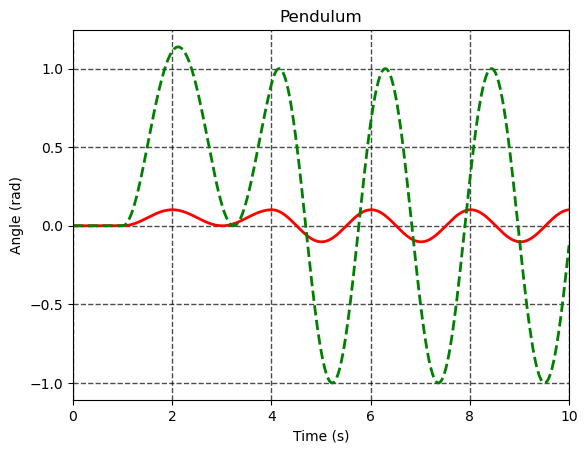

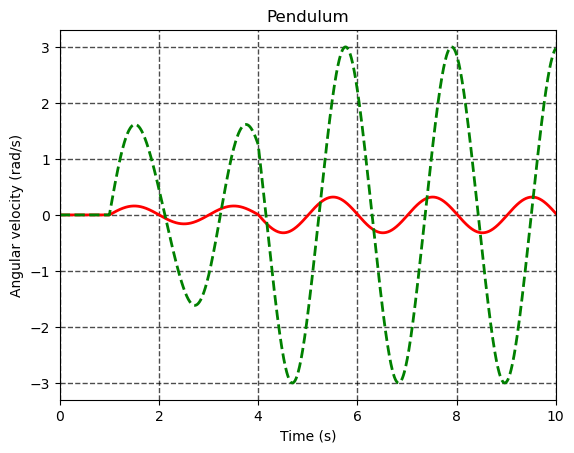

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PendulumNonlinear(theta,t,m,l,g,Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) +1/(m*l*l)*Te(t)
    return [dth1, dth2]

m = 0.1;
l = 1;
g = 9.8;

A = np.array([[0,1],[-g/l, 0]])
B = np.array([[0],
             [1]])
D = np.array([0])
C = np.array([[1,0],[0,1]])
R = np.array([0])

t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.5 if t>1 and t<4 else 0.0

x0 = np.array([0, 0]).flatten() # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

y1 = odeint(PendulumNonlinear, x0, T, args=(m,l,g, u_func))

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,0], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angle (rad)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,1], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

## Ex 4. Dynamic modeling of an inverted pendulum on the cart

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

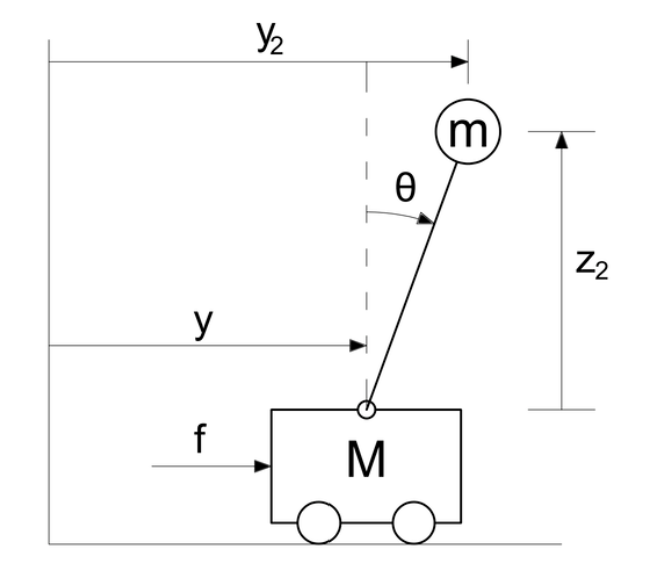

Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinates
    
    (theta)   angle between the pendulum and the vertical axis

## TODO
1) Show that the inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$
$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$

If you find it difficult to derive the equations yourself, please, watch the following video: 
https://www.youtube.com/watch?v=kXLjs5aW2uE

or, alternatively, check the following tutorial https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling

2) Rewrite the system equation in a canonical form $\dot x = f(x,u),$ where state vector $x = (y,\theta,\dot y,\dot\theta)$.

$$\begin{pmatrix} \dot y\\ \dot\theta\\\ddot y \\ \ddot\theta\end{pmatrix} = f(x,u)$$

with : $$ f\left(\begin{pmatrix} \dot y\\ \dot\theta\\\ddot y \\ \ddot\theta\end{pmatrix}, u \right)$$

3) Find an equlibrium point. Linearise the system equations by finding the Jacobian matrix.

LINEARISED
\begin{pmatrix} \dot y\\ \dot\theta\\\ddot y \\ \ddot\theta\end{pmatrix} = \begin{pmatrix}0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -b &  \end{pmatrix} \begin{pmatrix} y\\ \theta \\ \dot y \\ \dot\theta \end{pmatrix}

4) Simulate trajectories of the uncontrolled nonlinear system and its linear approximation for different initial vectors. What can you say about system dynamics?
